In [1]:
from fastai import *
from fastai.vision import *
from pathlib import Path

from fastai_autoencoder.bottleneck import VAEBottleneck
from fastai_autoencoder.decoder import SpatialDecoder2D
from fastai_autoencoder.learn import AutoEncoderLearner
from fastai_autoencoder.callback import VAEHook
from fastai_autoencoder.util import *

In [2]:
def create_encoder(nfs,ks,strides,conv=nn.Conv2d,bn=nn.BatchNorm2d,act_fn = nn.ReLU):
    n = len(nfs)
    
    conv_layers = [ConvBnRelu(nfs[i],nfs[i+1],kernel_size=ks[i],stride=strides[i],conv = conv,bn=bn,act_fn=act_fn)
                                   for i in range(n-1)]        
    convs = nn.Sequential(*conv_layers)
    
    return convs

def create_decoder(nfs,ks,conv = nn.Conv2d,bn = nn.BatchNorm2d,act_fn = nn.ReLU):
    n = len(nfs)
    
    # We add two channels to the first layer to include x and y channels
    first_layer = ConvBnRelu(nfs[0] + 2, nfs[1],conv = PointwiseConv,bn=bn,act_fn=act_fn)

    conv_layers = [first_layer] + [ConvBnRelu(nfs[i],nfs[i+1],kernel_size=ks[i-1],conv = conv,bn=bn,act_fn=act_fn)
                                   for i in range(1,n - 1)]        
    dec_convs = nn.Sequential(*conv_layers)
    
    return dec_convs

In [10]:
im_size = 64
conv = MobileConv
act_fn = nn.ReLU
bn = None

nfs = [1,8,16,32,64]
ks = [7,3,3,3]
strides = [2,2,2,2]
enc = create_encoder(nfs,ks,strides,conv=conv,bn=bn,act_fn=act_fn)

nfs = [1024,24]
vae_bn = VAEBottleneck(nfs,act_fn)

nfs = [24,32,32,16,8,1]
ks = [7,5,3,3]
dec_conv = create_decoder(nfs,ks,conv=conv,bn=bn,act_fn=act_fn)
dec = SpatialDecoder2D(dec_conv,im_size)

In [8]:
path = untar_data(URLs.MNIST)
bs = 4
tfms = get_transforms(do_flip = False)

size = 64

data = (ImageList.from_folder(path/"training")
        .split_by_rand_pct(0.2,seed=42)
        .label_from_folder()
        .transform(tfms,size = size)
        .databunch(bs = bs))

def get_one_channel(batch):
    x,y = batch
    return x[:,0,:,:].unsqueeze(1),y

get_one_channel._order = 99

data.add_tfm(get_one_channel)

In [ ]:
def create_data()

In [3]:
path = untar_data(URLs.MNIST)
bs = 64
tfms = get_transforms(do_flip = False)

size = 64

data = (ImageList.from_folder(path/"training")
        .split_none()
        .label_from_folder()
        .transform(tfms,size = size)
        .databunch(bs = bs))

# Creation of a small dataset of all images
n = len(data.train_ds.x.items)

train_size = 600
train_idx = np.random.choice(n,train_size,replace = False)

x_train,y_train = data.train_ds.x.items[train_idx],data.train_ds.y.items[train_idx]
train_df = pd.DataFrame({"name":x_train,"label":y_train})

In [2]:
valid_idx = np.array(list(set(np.arange(n)) - set(train_idx)))
x_valid,y_valid = data.train_ds.x.items[valid_idx],data.train_ds.y.items[valid_idx]
valid_df = pd.DataFrame({"name" : x_valid,"label":y_valid})

train_df.to_csv("train.csv",index=None)
valid_df.to_csv("valid.csv",index=None)

In [3]:
df = pd.read_csv("train.csv")

path = Path("/")
bs = 4
tfms = get_transforms(do_flip = False)

size = 64

data = (ImageList.from_df(df,path)
        .split_by_rand_pct(0.2,seed=42)
        .label_from_folder()
        .transform(tfms,size = size)
        .databunch(bs = bs))

def get_one_channel(batch):
    x,y = batch
    return x[:,0,:,:].unsqueeze(1),y

get_one_channel._order = 99

data.add_tfm(get_one_channel)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\/home/DanyWin/.fastai/data/mnist_png/training/1/10169.png'

In [5]:
# Original
act_fn = nn.ReLU(inplace=True)

nfs = [1,8,64,64,64]
enc = Encoder(MobileConv,nfs,act_fn)

nfs = [1024,128,8]
vae_bn = VAEBottleneck(nfs,act_fn)
vn_bn = Bottleneck(nfs,act_fn)

nfs = [8,64,32,1]
dec = Decoder(MobileConv,nfs,act_fn,size)

learn = AutoEncoderLearner(data,F.mse_loss,enc,vae_bn,dec)
# learn = AutoEncoderLearner(data,F.mse_loss,enc,vn_bn,dec)

kl_hook = VAEHook(learn,beta=1)

x,y = data.one_batch()

TypeError: __init__() missing 1 required positional argument: 'ks'

In [9]:
act_fn = nn.ReLU(inplace=True)

nfs = [1,8,64,64,64]
enc = Encoder(MobileConv,nfs,act_fn)

nfs = [1024,24]
vae_bn = VAEBottleneck(nfs,act_fn)
vn_bn = Bottleneck(nfs,act_fn)

nfs = [24,32,32,16,8,1]
ks = [7,5,3,3]
dec = Decoder(MobileConv,nfs,act_fn,size,ks)

learn = AutoEncoderLearner(data,F.mse_loss,enc,vae_bn,dec)
# learn = AutoEncoderLearner(data,F.mse_loss,enc,vn_bn,dec)

kl_hook = VAEHook(learn,beta=1)

learn.path = Path()

learn.plot_rec()

RuntimeError: CUDA error: unknown error

In [8]:
learn.path = Path()
learn.load("model_tiny_mnist")

AutoEncoderLearner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
1,2,4,4,6
Path: /;

Valid: LabelList (120 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,6,8,7,0
Path: /;

Test: None, model=Sequential(
  (0): Encoder(
    (enc_convs): Sequential(
      (0): MobileConv(
        (depth_conv): DepthwiseConv(
          (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
        (point_conv): PointwiseConv(
          (conv): Conv2d(1, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
 

In [8]:
learn.fit_one_cycle(50,1e-3)

epoch,train_loss,valid_loss,time
0,662.234131,432.141327,00:01
1,645.513489,424.196564,00:01
2,630.964294,413.962769,00:01
3,612.090637,402.023224,00:01
4,587.095825,391.292145,00:01
5,563.048889,379.781769,00:01
6,535.843323,369.064453,00:01
7,509.130432,359.209381,00:01
8,483.417786,353.764069,00:01
9,461.918518,350.124664,00:01


In [9]:
learn.fit_one_cycle(50,1e-2,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,313.203857,311.743683,00:01
1,314.418945,311.336273,00:01
2,313.966614,309.932434,00:01
3,313.948547,310.432953,00:01
4,314.185211,310.417572,00:01
5,313.972626,320.266602,00:01
6,313.608704,310.188995,00:01
7,313.002380,327.939850,00:01
8,312.362671,323.959106,00:01
9,311.903412,351.181793,00:01


In [8]:
learn.path = Path()
learn.load("model_tiny_mnist_diverse_600")

AutoEncoderLearner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
1,2,4,4,6
Path: /;

Valid: LabelList (120 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,6,8,7,0
Path: /;

Test: None, model=Sequential(
  (0): Encoder(
    (enc_convs): Sequential(
      (0): MobileConv(
        (depth_conv): DepthwiseConv(
          (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
        (point_conv): PointwiseConv(
          (conv): Conv2d(1, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
 

In [11]:
learn.fit_one_cycle(50,1e-2 / 2,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,147.959213,138.263214,00:01
1,145.559326,143.471710,00:01
2,145.847610,148.887985,00:01
3,145.531219,167.150833,00:01
4,145.884842,152.544434,00:01
5,146.368210,242.458923,00:01
6,145.612045,185.188751,00:01
7,144.627502,245.995697,00:01
8,145.233444,228.151627,00:01
9,145.500687,287.188812,00:01


In [13]:
learn.fit_one_cycle(50,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,85.226593,72.564667,00:01
1,85.736305,73.545563,00:01
2,85.948997,76.470894,00:01
3,86.043106,76.896896,00:01
4,86.148605,77.072052,00:01
5,86.277924,84.312881,00:01
6,86.398750,90.199249,00:01
7,86.155937,110.812370,00:01
8,85.813133,102.038803,00:01
9,86.521660,93.080109,00:01


In [14]:
learn.fit_one_cycle(50,1e-3 / 3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,77.663284,65.374359,00:01
1,75.423019,65.438583,00:01
2,76.975250,65.318230,00:01
3,78.083054,66.216934,00:01
4,78.084579,66.286102,00:01
5,77.976196,66.847183,00:01
6,77.945938,67.264198,00:01
7,78.310699,69.503471,00:01
8,78.147202,67.991585,00:01
9,78.228973,71.679482,00:01


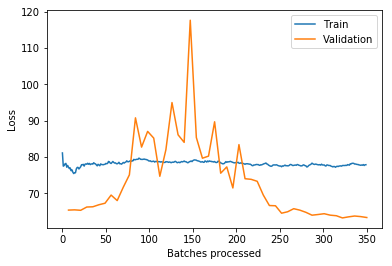

In [16]:
learn.recorder.plot_losses()

In [18]:
learn.fit(10,1e-4,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,79.139397,65.342964,00:01
1,76.493561,65.900307,00:01
2,76.193390,64.741867,00:01
3,75.823639,65.475624,00:01
4,76.005371,65.908661,00:01
5,76.035278,64.833961,00:01
6,77.377480,65.689537,00:01
7,77.124390,66.771568,00:01
8,77.190369,65.359581,00:01
9,77.247147,64.997208,00:01


Computing the TSNE projection


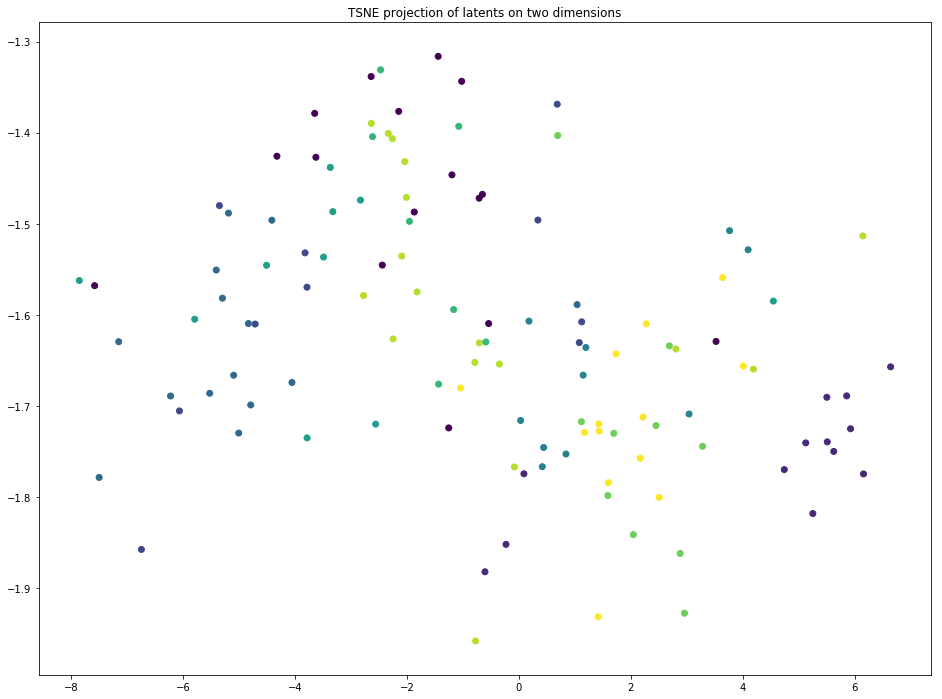

In [20]:
learn.plot_2d_latents()

In [19]:
learn.fit_one_cycle(50,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,327.667267,299.574799,00:01
1,327.620667,300.297729,00:01
2,325.900055,301.367493,00:01
3,325.299072,300.600494,00:01
4,325.727539,300.907135,00:01
5,325.663940,299.822906,00:01
6,325.654602,299.968811,00:01
7,324.793091,301.554626,00:01
8,324.764923,299.219635,00:01
9,325.246765,296.962921,00:01


In [20]:
learn.fit_one_cycle(50,1e-2,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,313.911987,291.549652,00:01
1,313.962952,291.401703,00:01
2,314.361176,290.278870,00:01
3,314.008392,290.486969,00:01
4,314.144989,295.944275,00:01
5,313.581390,309.588196,00:01
6,311.102997,285.945648,00:01
7,307.873901,341.384491,00:01
8,304.963165,325.022308,00:01
9,303.923065,347.652313,00:01


In [29]:
learn.path = Path()
learn.save("model_tiny_mnist")

In [ ]:
learn.fit_one_cycle(50,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,57.737854,39.857327,00:01
1,56.296490,39.995770,00:01
2,56.139412,40.003700,00:01
3,56.015373,41.290668,00:01
4,55.759865,43.782330,00:01
5,55.750996,51.466217,00:01
6,55.593506,52.640602,00:01
7,55.319515,44.333965,00:01
8,54.744308,46.669445,00:01


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


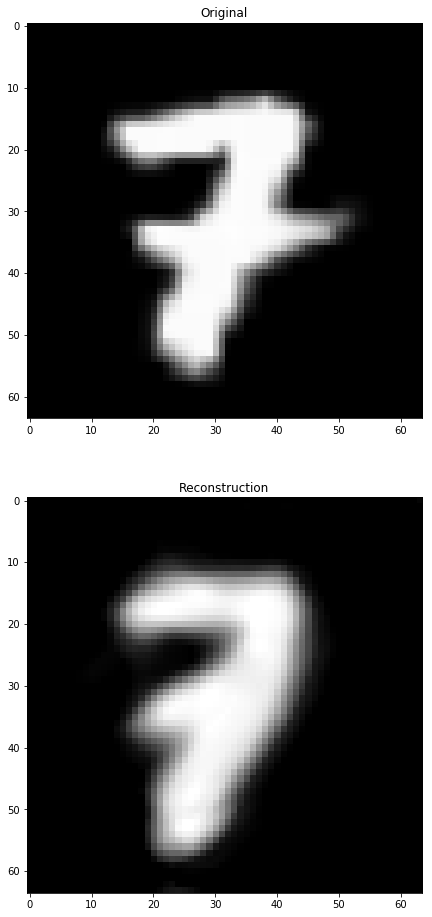

In [28]:
learn.plot_rec()

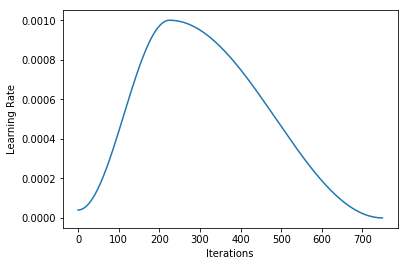

In [205]:
learn.recorder.plot_lr()

In [ ]:
learn.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,time
0,186.443817,172.873672,01:21


In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_lr()

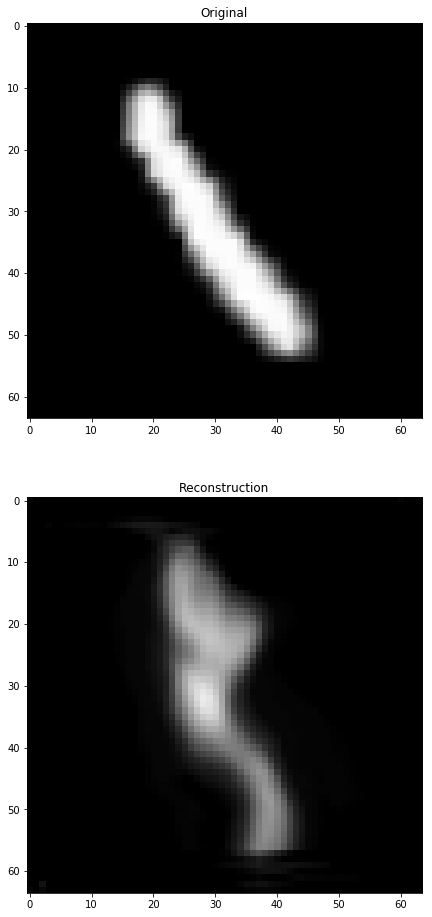

In [199]:
learn.plot_rec()

In [150]:
learn.fit_one_cycle(20,0.001, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,311.352600,293.794006,00:01
1,311.875549,293.561951,00:01
2,312.840057,292.527191,00:01
3,313.527039,291.367889,00:01
4,312.791351,292.578522,00:01
5,312.165039,292.824432,00:01
6,312.212738,293.863983,00:01
7,312.686737,293.060303,00:01
8,312.765015,294.376648,00:01
9,312.912292,294.179504,00:01


Exception ignored in: <function _releaseLock at 0x7f6a04ec8268>
Traceback (most recent call last):
  File "/data/anaconda/envs/naox3/lib/python3.7/logging/__init__.py", line 221, in _releaseLock
    def _releaseLock():
KeyboardInterrupt


RuntimeError: DataLoader worker (pid(s) 46399, 46400, 46401, 46402, 46403) exited unexpectedly

In [100]:
learn.fit_one_cycle(20,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,167.087067,161.260559,00:01
1,165.849213,207.271729,00:01
2,166.081223,230.733353,00:01
3,165.292831,279.162933,00:01
4,162.295334,346.783173,00:01
5,159.016190,353.605988,00:01
6,156.789597,367.906799,00:01
7,153.706039,379.368927,00:01
8,149.689819,332.639130,00:01
9,145.825058,345.919983,00:01


In [101]:
learn.fit_one_cycle(20,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,83.719559,99.517242,00:01
1,86.316925,208.100586,00:01
2,85.076248,300.437653,00:01
3,86.161240,236.367661,00:01
4,89.724571,283.220215,00:01
5,92.255531,391.955078,00:01
6,93.977066,384.961761,00:01
7,94.231354,468.632538,00:01
8,93.703514,392.031860,00:01
9,93.819504,425.931396,00:01


In [102]:
learn.fit_one_cycle(20,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,64.837059,76.988464,00:01
1,65.246910,112.132652,00:01
2,65.836548,295.060150,00:01
3,67.180550,442.146881,00:01
4,71.149643,401.489471,00:01
5,73.505981,297.979065,00:01
6,74.187065,711.210571,00:01
7,75.291489,366.009644,00:01
8,76.285057,490.532959,00:01
9,77.469978,351.097870,00:01


In [106]:
learn.fit(20,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,61.192387,423.745941,00:01
1,60.320213,343.563965,00:01
2,59.512169,469.330444,00:01
3,60.981125,549.421997,00:01
4,61.547863,482.479614,00:01
5,62.572712,402.998657,00:01
6,62.821804,404.397308,00:01
7,61.996685,385.199371,00:01
8,61.901665,632.538147,00:01
9,62.380810,544.910767,00:01


In [180]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,time
0,331.782593,308.772186,00:17
1,314.869568,296.909882,00:17
2,311.681244,294.847290,00:17


In [157]:
learn.fit_one_cycle(3,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,323.634308,306.419159,00:17
1,324.811981,304.676666,00:17
2,323.575287,304.803741,00:17


In [34]:
learn.fit_one_cycle(3,1e-2, callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,70.394707,545.601624,00:17
1,63.170486,241.202850,00:17
2,49.488338,31.310871,00:17


In [35]:
learn.save("model_large_rec_sample_mnist")

In [36]:
learn.fit_one_cycle(3,1e-3, callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3, callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3, callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3, callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3, callbacks=[kl_hook])
learn.save("model_large_rec")

epoch,train_loss,valid_loss,time
0,228.880127,237.449265,01:07
1,136.581879,119.226364,01:07


epoch,train_loss,valid_loss,time
0,99.061813,276.806305,01:08
1,77.995613,61.628162,01:08


epoch,train_loss,valid_loss,time
0,74.748482,181.742828,01:08
1,63.266308,47.877563,01:08


epoch,train_loss,valid_loss,time
0,64.305099,168.689041,01:08
1,56.094509,41.722851,01:08


epoch,train_loss,valid_loss,time
0,59.310669,145.826401,01:08
1,51.854801,37.871250,01:08


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


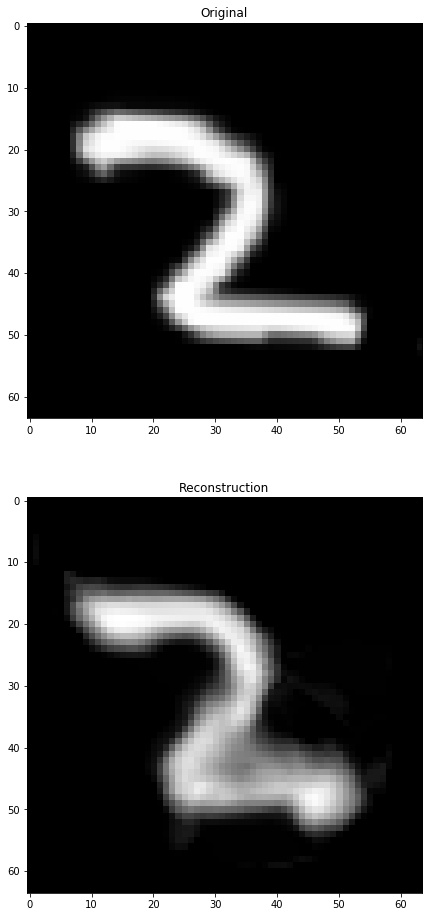

In [63]:
learn.plot_rec()

Computing the TSNE projection


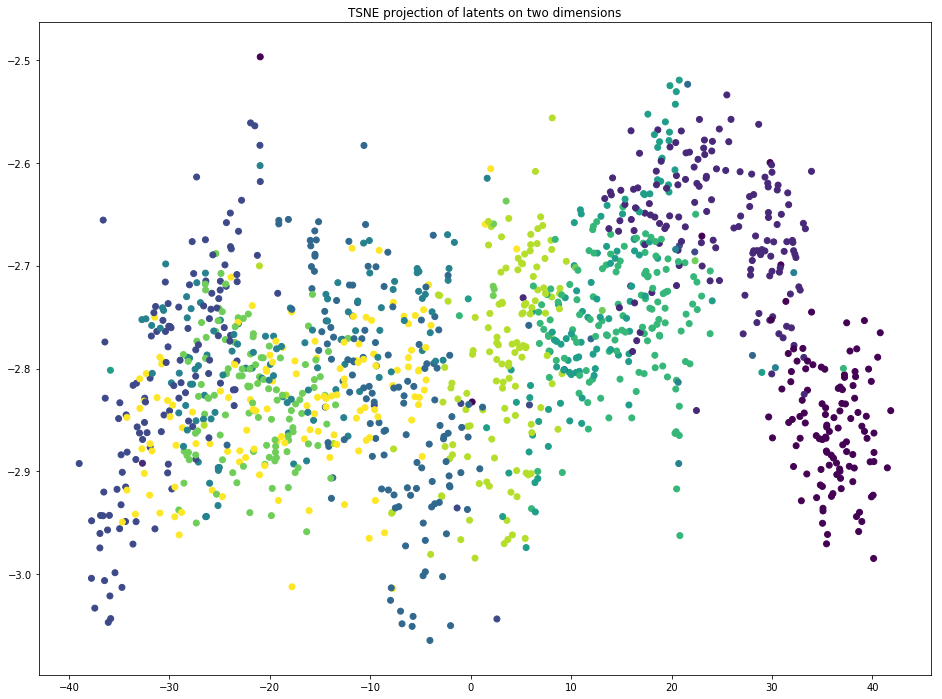

In [43]:
learn.plot_2d_latents()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


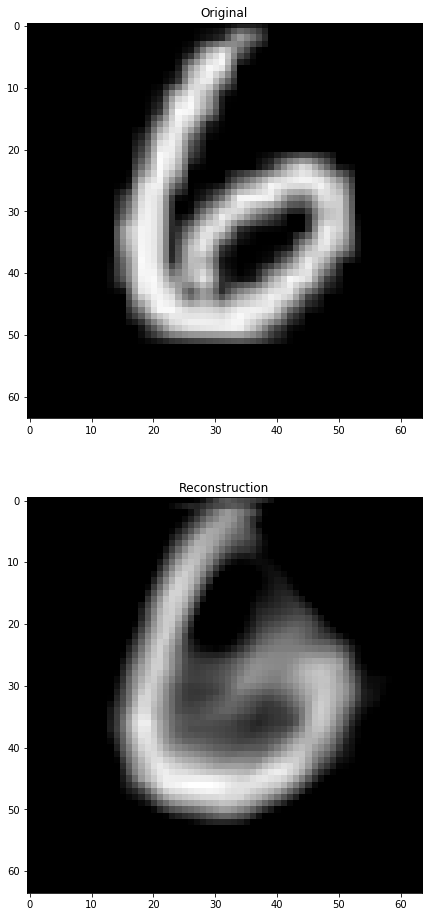

In [12]:
learn.plot_rec()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


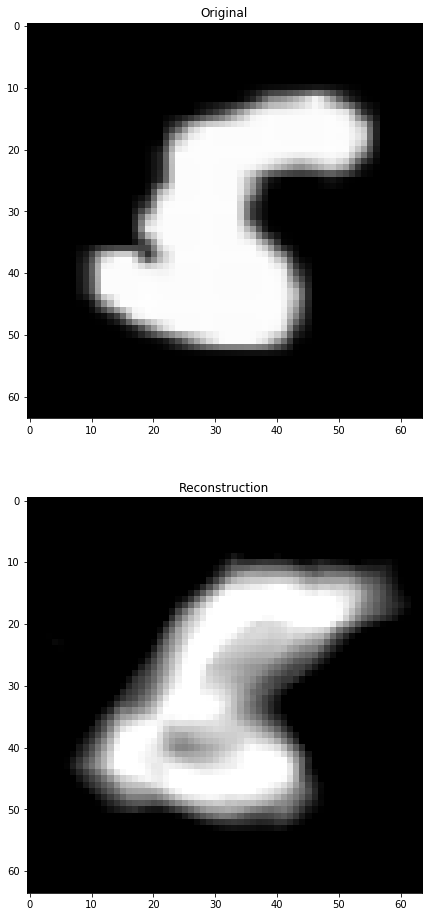

In [4]:
learn.path = Path(".")
learn.load("model")
learn.plot_rec(x)

In [19]:
def plot_shades(learn,x=None,i=0,n_perturb = 13, mag_perturb = 3, ax = None,gray = True):
    """Plot the reconstruction of the """
    learn.model.cpu()
    if not isinstance(x,torch.Tensor):
        x,y = learn.data.one_batch()

    x = x[i].unsqueeze(0)

    # We get the latent code
    z = learn.encode(x)
    n_z = z.shape[1]

    # We create a scale of perturbations
    mag_perturb = np.abs(mag_perturb)
    scale_perturb = np.linspace(-mag_perturb,mag_perturb,n_perturb)

    if not ax:
        fig, ax = plt.subplots(n_z,n_perturb, figsize=(20,20))
        fig.tight_layout()

    for i in range(n_z):
        for (j,perturb) in enumerate(scale_perturb):
            # For each z_i we add a minor perturbation
            z_perturb = z.clone()
            z_perturb[0,i] += perturb

            # We reconstruct our image
            x_rec = learn.decode(z_perturb)
            
            # We plot it in the grid
            img = x_rec.squeeze(0).permute(1,2,0).detach().numpy()
            if gray:
                img = np.concatenate([img,img,img],axis = -1)
            ax[i][j].set_axis_off()
            ax[i][j].imshow(img)
            ax[i][j].set_title(f"z_{i} with {round(perturb * 1e2) / 1e2}")

In [9]:
df = pd.read_csv("valid.csv")

path = Path("/")
bs = 512
tfms = get_transforms(do_flip = False)

size = 64
data_valid = (ImageList.from_df(df,path)
        .split_none()
        .label_from_folder()
        .transform(tfms,size = size)
        .databunch(bs = bs))

data_valid.add_tfm(get_one_channel)

learn.data = data_valid
z_valid,y_valid = learn.get_latents(DatasetType.Train)
z_valid, y_valid = z_valid.numpy(), y_valid.numpy()

In [15]:
path = untar_data(URLs.MNIST)

In [16]:
data,valid_data = get_data(2048)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\C:\\Users\\Daniel\\.fastai\\data\\mnist_png\\training\\2\\12598.png'

In [21]:
p = Path("C:\\Users\\Daniel\\.fastai\\data\\mnist_png\\training\\2\\")

In [22]:
list(p.iterdir())

[WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10009.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10016.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10024.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10029.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10072.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10073.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10075.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10078.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10081.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10082.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10084.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10087.png'),
 WindowsPath('C:/Users/Daniel/.fastai/data/mnist_png/training/2/10090.png'),

In [13]:
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from fastai.core import parallel

params = {"criterion" : "entropy",
     "max_depth" : 10,
     "max_features" : 0.8,
     "n_jobs" : -1}

def get_data(train_size,bs = 64,size = 64):

    path = untar_data(URLs.MNIST)
    tfms = get_transforms(do_flip = False)

    data = (ImageList.from_folder(path/"training")
            .split_none()
            .label_from_folder()
            .transform(tfms,size = size)
            .databunch(bs = bs))

    # Creation of a small dataset of all images
    n = len(data.train_ds.x.items)

    train_idx = np.random.choice(n,train_size,replace = False)
    x_train,y_train = data.train_ds.x.items[train_idx],data.train_ds.y.items[train_idx]
    train_df = pd.DataFrame({"name":x_train,"label":y_train})
    
    valid_idx = np.array(list(set(np.arange(n)) - set(train_idx)))
    x_valid,y_valid = data.train_ds.x.items[valid_idx],data.train_ds.y.items[valid_idx]
    valid_df = pd.DataFrame({"name" : x_valid,"label":y_valid})

    path = Path("/")

    # Data used ofr the training of the autoencoder
    data = (ImageList.from_df(train_df,path)
            .split_by_rand_pct(seed=42)
            .label_from_df()
            .transform(tfms,size = size)
            .databunch(bs = bs))
    
    valid_data = (ImageList.from_df(valid_df,path)
            .split_none()
            .label_from_df()
            .transform(tfms,size = size)
            .databunch(bs = bs))
    
    def get_one_channel(batch):
        x,y = batch
        return x[:,0,:,:].unsqueeze(1),y
    get_one_channel._order = 99

    data.add_tfm(get_one_channel)
    valid_data.add_tfm(get_one_channel)
    
    return data, valid_data

def create_random_forest(learn,n_forest,**kwargs):
    rfs = []
    for i in range(n_forest):
        z,y = learn.get_latents(DatasetType.Train)
        z,y = z.numpy(),y.numpy()
        
        rf = RandomForestClassifier(**kwargs)
        rf.fit(z,y)
        rfs.append(rf)
        
    return rfs

def vote(a,threshold = 0.5):
    values,count = np.unique(a,return_counts=True)
    total = np.sum(count)
    max_count = np.argmax(count)
    
    if count[max_count] / total < threshold:
        return -1
    else:
        output = values[max_count]
        return output
    
def compute_score(y_pred,y_valid):
    """Compute the number of times the trees agree and what is their accuracy on the agreed votes"""
    idx = (y_pred != -1)
    vote_pct = np.sum(idx) / len(idx)
    score = (y_pred[idx] == y_valid[idx]).mean()
    return vote_pct,score

def compute_metrics(train_size,n_estimators,n_rf,learn):
    # First we add the data set with the right size to our learner
    get_data(train_size,learn)
    
    params["n_estimators"] = n_estimators
    
    rfs = create_random_forest(learn,n_rf,**params)
    
    def predict_latents(model,index,z_valid):
        output = model.predict(z_valid)
        return output

    predict = partial(predict_latents,z_valid = z_valid)
    y = []
    for rf in rfs:
        for tree in rf.estimators_:
            y.append(tree.predict(z_valid).reshape(-1,1))

    y = np.concatenate(y,axis = -1).astype(int)
    
    y_pred = np.apply_along_axis(vote,1,y)
    
    output = {"train_size":train_size,"n_estimators":n_estimators,"n_rf":n_rf}
    output["vote_pct"], output["score"] = compute_score(y_pred,y_valid)
    
    return output

In [18]:
# train_size = [1024,2048,4096]
train_size = [512]
n_rf = [1,1,10,20,1]
n_estimators = [10,100,10,10,200]

# outputs = []

for t in train_size:
    for n_r,n_e in zip(n_rf,n_estimators):
        print(f"Computing {t} with {n_r} forests and {n_e} trees")
        output = compute_metrics(t,n_e,n_r,learn)
        outputs.append(output)
# compute_metrics(1024,10,1,learn)

In [21]:
results = pd.DataFrame(outputs)
results.to_csv("results.csv",index = None)

In [22]:
results["mean"] = (results["vote_pct"] + results["score"]) * 0.5

In [23]:
results

,n_estimators,n_rf,score,train_size,vote_pct,mean
0,10,1,0.837011,1024,0.721882,0.779446
1,100,1,0.934247,1024,0.599205,0.766726
2,10,10,0.940864,1024,0.596208,0.768536
3,10,20,0.949533,1024,0.591527,0.770530
4,200,1,0.943389,1024,0.583833,0.763611
5,10,1,0.859114,2048,0.773589,0.816352
6,100,1,0.928775,2048,0.671841,0.800308
7,10,10,0.943587,2048,0.658119,0.800853
8,10,20,0.949902,2048,0.653354,0.801628
9,200,1,0.936789,2048,0.669383,0.803086


In [68]:


params = {"n_estimators":200,
         "criterion" : "entropy",
         "max_depth" : 10,
         "max_features" : 0.8,
         "n_jobs" : -1}

n_rf = 1

rfs = create_random_forest(learn,n_rf,**params)




    
y_pred = np.apply_along_axis(vote,1,y)

In [69]:
# Single rf : 3000 samples
idx = (y_pred != -1)
print(np.sum(idx) / len(idx))
(y_pred[idx] == y_valid[idx]).mean()

0.8170460668103449


0.8694926431191526

In [67]:
# Multiple rf : 3000 samples
idx = (y_pred != -1)
print(np.sum(idx) / len(idx))
(y_pred[idx] == y_valid[idx]).mean()

0.7785391971982759


0.931832435822574

In [56]:
uncert = (y_pred == -1 )

In [75]:
v,c = np.unique(learn.data.valid_ds.y[uncert].items,return_counts=True)

In [79]:
df = pd.DataFrame({"index" : v,"count" : c})


,index,count
0,0,423
1,1,138
2,2,790
3,3,768
4,4,586
5,5,685
6,6,362
7,7,701
8,8,1513
9,9,595


In [80]:
df.sort_values("count")

,index,count
1,1,138
6,6,362
0,0,423
4,4,586
9,9,595
5,5,685
7,7,701
3,3,768
2,2,790
8,8,1513


In [46]:
# Multiple rf
idx = (y_pred != -1)
print(np.sum(idx) / len(idx))
(y_pred[idx] == y_valid[idx]).mean()

0.8633125


0.9392118535678949

In [54]:
rf = rfs[0]

In [55]:
labels = [f"z_{i}" for i in range(len(rf.feature_importances_))]
feats = rf.feature_importances_
df = pd.DataFrame(labels,feats)

In [56]:
df.sort_index()

,0
0.006576,z_12
0.006695,z_7
0.008128,z_24
0.008643,z_29
0.010957,z_17
0.011098,z_16
0.011183,z_28
0.013577,z_14
0.014662,z_18
0.016579,z_10


In [16]:
X_test = z_valid

sample_id = 0
estimator = rfs[0].estimators_[0]

In [22]:
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right

In [21]:
node_indicator = estimator.decision_path(X_test)
leave_id = estimator.apply(X_test)

feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 7] (= -4.7002635) <= -3.9674233198165894)
decision id node 1 : (X_test[0, 10] (= -4.1538806) <= -3.8830102682113647)
decision id node 2 : (X_test[0, 4] (= 1.769853) <= 1.8463399410247803)
decision id node 3 : (X_test[0, 2] (= -4.7491693) <= -4.232415437698364)
decision id node 4 : (X_test[0, 1] (= 1.9424701) > 1.924157440662384)
decision id node 56 : (X_test[0, 14] (= 1.2844998) <= 1.400970697402954)
decision id node 57 : (X_test[0, 13] (= -0.15352787) > -0.5334719717502594)
decision id node 69 : (X_test[0, 4] (= 1.769853) > 1.5273671746253967)
decision id node 77 : (X_test[0, 2] (= -4.7491693) <= -4.639214754104614)
decision id node 78 : (X_test[0, 10] (= -4.1538806) > -4.450443983078003)


In [112]:
21 % 5

1

In [119]:
def plot_node_reconstruction(learn, tree, z_valid,y_valid,node_id = 0,n_imgs = 20):

    idx = (tree.decision_path(z_valid)[:,node_id].toarray() == 1.).reshape(-1)
    
    # We take the mean of the images in the given node
    z = z_valid[idx,:]
    y = y_valid[idx]
    
    values,count = np.unique(y,return_counts=True)
    print(f"Values : {values} with distribution {count}")
    
#     value, count = np.unique(y,return_counts=True)
#     max_count = np.argmax(count)
#     max_label = value[max_count]
    
#     idx = (y == max_label)
    
#     z = z[idx,:]
    
    if not isinstance(z,torch.Tensor):
        z = torch.tensor(z)
    learn.model.cpu()
    with torch.no_grad():
        imgs = learn.decode(z)
    
    n = z.shape[0]
    n_sample = min(n,n_imgs)
    
    idx = np.random.choice(n,n_sample,replace = False)
    
    z = z[idx,:]
    y = y[idx]
    
    img_per_row = 5
    n_rows = n_sample // img_per_row
    if n_sample  % img_per_row != 0:
        n_rows += 1
        
    f, ax = plt.subplots(n_rows,img_per_row,figsize = (20,20))
    
    for i in range(n_rows):
        for j in range(img_per_row):
            img = imgs[i * img_per_row + j].permute(1,2,0).numpy()
            img = np.concatenate([img,img,img],axis = -1)
            ax[i,j].imshow(img)
            ax[i,j].set_title(f"Label : {y[i]}")

Values : [4 7 8 9] with distribution [ 59 599   5 407]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

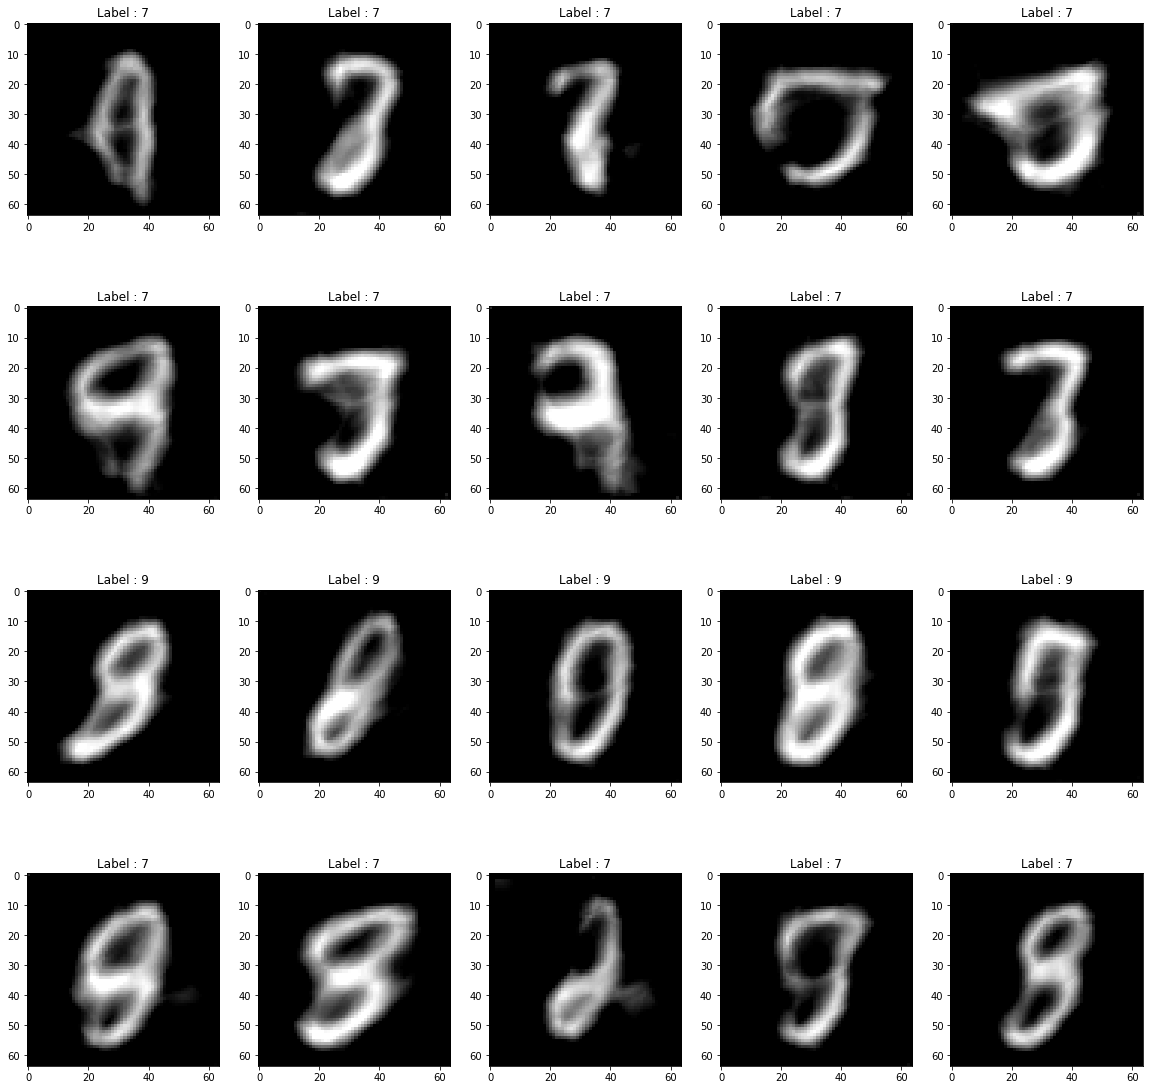

In [122]:
plot_node_reconstruction(learn,estimator,z_valid,y_valid,77)

Freezing all layers
Unfreezing all layers


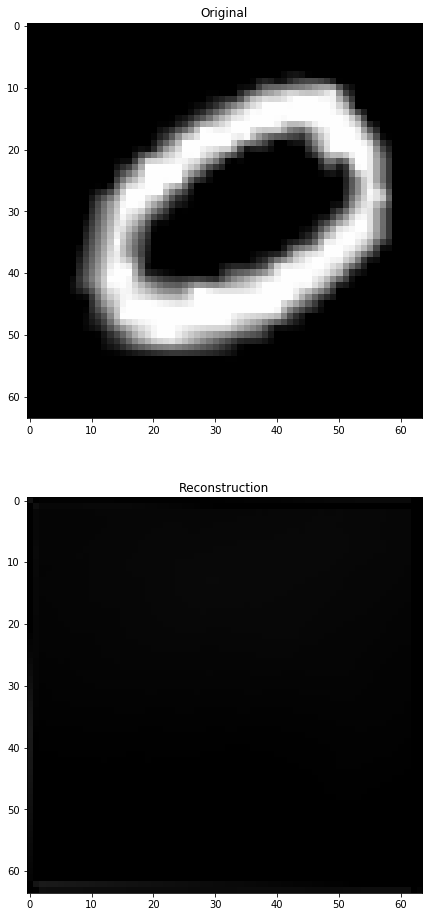

In [28]:
from fastai_autoencoder.util import lsuv_init

def find_modules(m, cond):
    if cond(m): return [m]
    return sum([find_modules(o,cond) for o in m.children()], [])

def is_lin_layer(l):
    lin_layers = (nn.Linear)
    return isinstance(l, lin_layers)

layers = find_modules(learn.model, is_lin_layer)
output = lsuv_init(learn.model,x.cuda(),layers=layers)
learn.plot_rec(x)

In [55]:
# We load the former model
learn.path = Path()
learn = learn.load(Path("model"))

In [29]:
learn.fit(1,1e-4)

epoch,train_loss,valid_loss,time
0,383.507355,360.482971,00:51


In [30]:
# Batchnorm without LSUV
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,152.533173,135.702316,00:52
1,109.294441,93.152649,00:51


epoch,train_loss,valid_loss,time
0,94.334465,166.097168,00:52
1,81.429611,66.828392,00:51


epoch,train_loss,valid_loss,time
0,80.085953,144.533447,00:52
1,72.479675,57.421322,00:51


epoch,train_loss,valid_loss,time
0,72.561394,107.953918,00:52
1,66.752518,52.354488,00:52


In [31]:
# We load the former model
learn.path = Path()
learn.save("model")

In [32]:
# Batchnorm without LSUV
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,67.297760,92.637917,00:53
1,62.453762,48.557568,00:52


epoch,train_loss,valid_loss,time
0,65.587029,113.099106,00:51
1,59.489765,46.318256,00:52


epoch,train_loss,valid_loss,time
0,62.109524,100.897247,00:52
1,58.130547,44.578648,00:52


epoch,train_loss,valid_loss,time
0,60.766949,144.446915,00:52
1,56.150398,43.010925,00:52


In [48]:
# We load the former model
learn.path = Path()
learn.save("model")

In [52]:
learn.load("model")

AutoEncoderLearner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
5,5,5,5,5
Path: /home/DanyWin/.fastai/data/mnist_png/training;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
7,1,1,2,2
Path: /home/DanyWin/.fastai/data/mnist_png/training;

Test: None, model=Sequential(
  (0): Encoder(
    (enc_convs): Sequential(
      (0): MobileConv(
        (depth_conv): DepthwiseConv(
          (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
        (point_conv): PointwiseConv(
          (conv): Conv2d(1, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(8, eps=1e-05, moment

Computing the TSNE projection


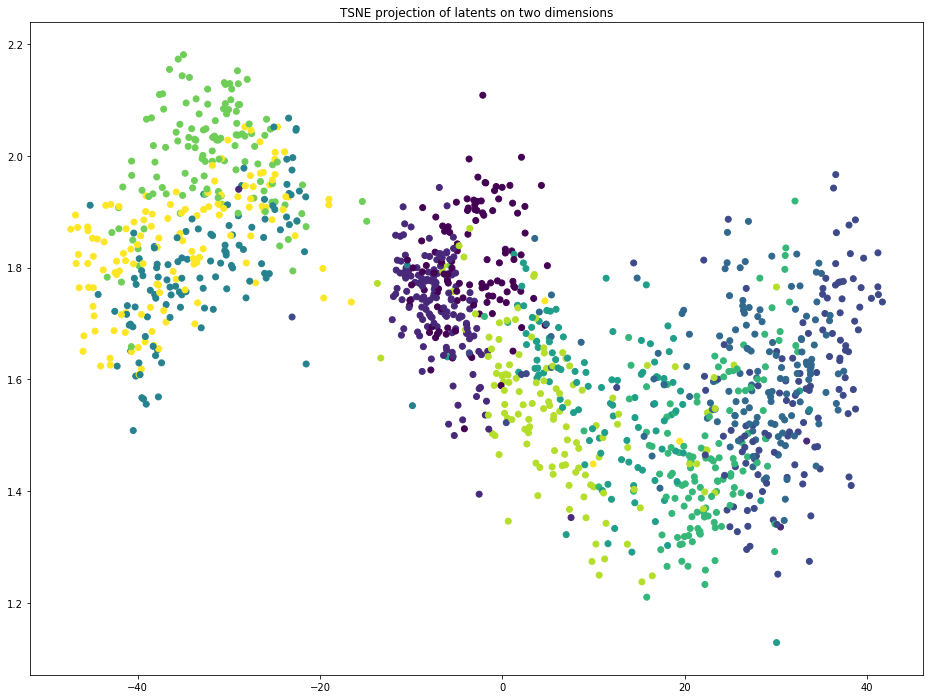

In [53]:
learn.plot_2d_latents()

In [49]:
# Batchnorm without LSUV
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,57.213802,74.782753,00:52
1,52.283051,40.029442,00:52


epoch,train_loss,valid_loss,time
0,55.669727,110.084648,00:52
1,51.821789,39.593864,00:52


Computing the TSNE projection


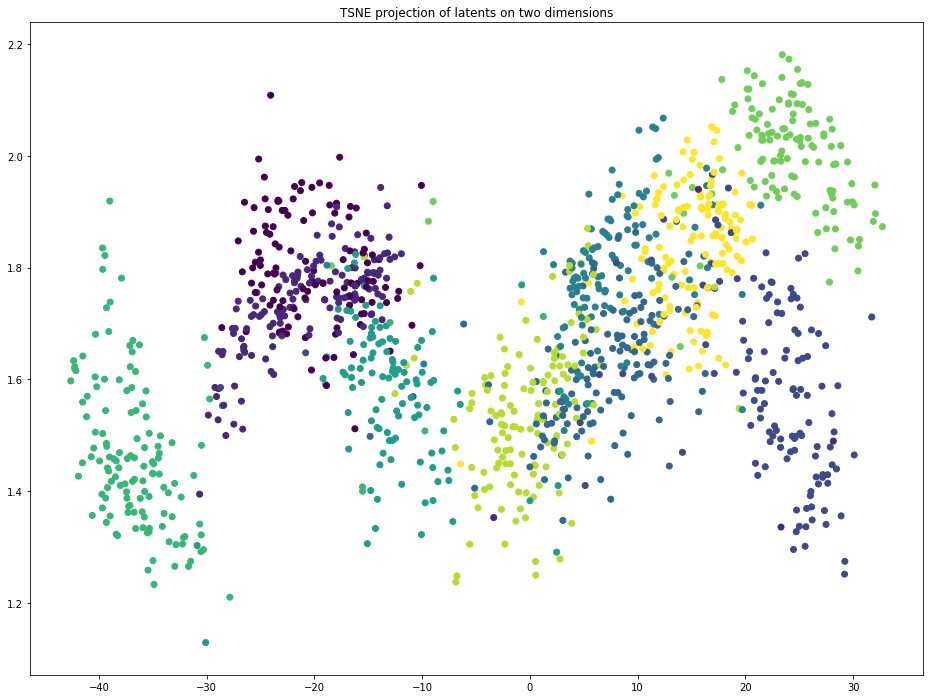

In [50]:
learn.plot_2d_latents()

In [51]:
learn.path = Path()
learn.save("model")

In [56]:
# Batchnorm + LSUV Linear
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,359.752563,341.500824,00:52
1,355.527985,339.326813,00:52


epoch,train_loss,valid_loss,time
0,313.254883,379.046082,00:52
1,209.952744,192.542297,00:53


epoch,train_loss,valid_loss,time
0,144.043869,139.578751,00:52
1,105.654976,88.906311,00:53


epoch,train_loss,valid_loss,time
0,91.867798,88.411674,00:53
1,78.289078,62.504765,00:53


epoch,train_loss,valid_loss,time
0,74.689232,89.515717,00:53
1,67.384964,51.905613,00:53


In [9]:
# LSUV without BN
learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

learn.fit_one_cycle(2,1e-3,callbacks=[kl_hook])

epoch,train_loss,valid_loss,time
0,505.914124,424.364380,00:45
1,431.141815,406.954834,00:46


epoch,train_loss,valid_loss,time
0,398.508270,345.695007,00:46
1,94684.343750,344.612701,00:46


epoch,train_loss,valid_loss,time
0,316.774323,286.658508,00:46


Traceback (most recent call last):
Traceback (most recent call last):
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/data/anaconda/envs/naox3/lib/python3.7/multiprocessing/connection.py", line 404, in _

KeyboardInterrupt: 

In [7]:
learn.path = Path(".")
learn.load("model")

AutoEncoderLearner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
5,5,5,5,5
Path: /home/DanyWin/.fastai/data/mnist_png/training;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
7,1,1,2,2
Path: /home/DanyWin/.fastai/data/mnist_png/training;

Test: None, model=Sequential(
  (0): Encoder(
    (enc_convs): Sequential(
      (0): MobileConv(
        (depth_conv): DepthwiseConv(
          (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act_fn): ReLU(inplace)
        )
        (point_conv): PointwiseConv(
          (conv): Conv2d(1, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(8, eps=1e-05, moment

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


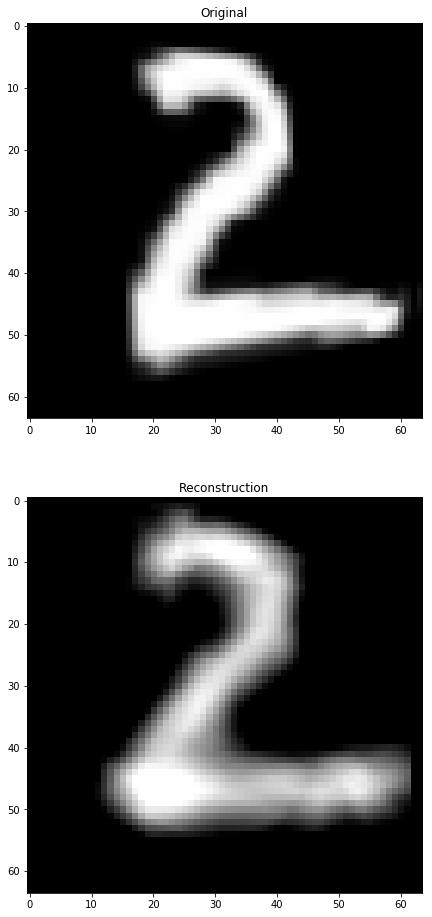

In [8]:
learn.plot_rec()

In [9]:
learn.plot_shades()

UnboundLocalError: local variable 'n_z' referenced before assignment

Computing the TSNE projection


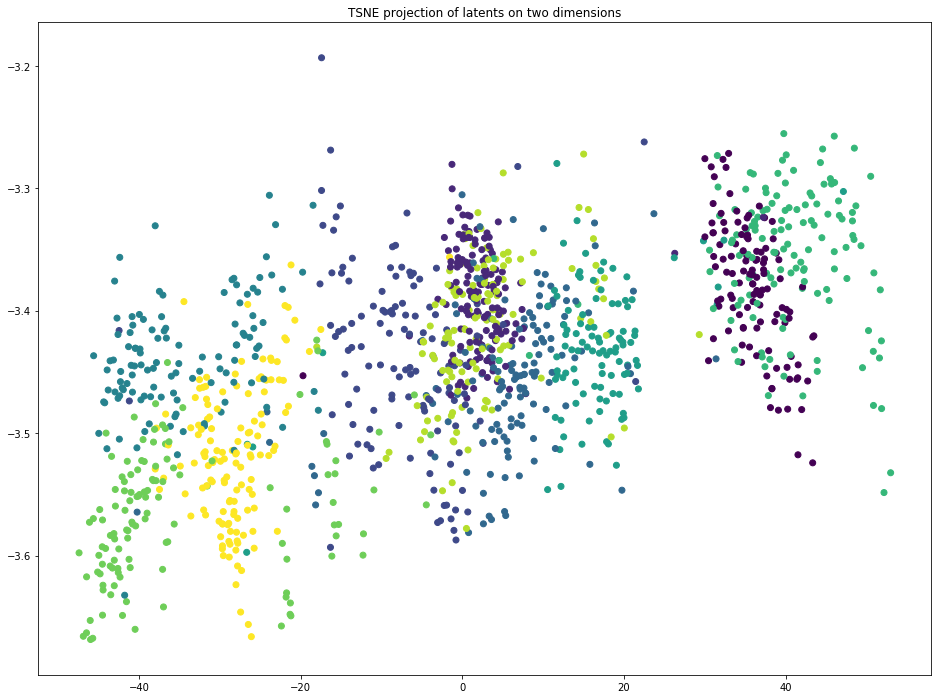

In [26]:
learn.plot_2d_latents(n_batch=20)

In [19]:
output = learn.get_error()

In [77]:
data = loss_func(x,x_rec).numpy()

In [90]:
alpha = np.percentile(data,95)

In [91]:
mask = (data > alpha)

In [108]:
values = learn.data.valid_ds.y.items[idx].reshape(-1)

In [109]:
pd.value_counts(values)

8    160
2    151
4     60
5     51
3     48
6     46
0     32
7     26
9     24
1      2
dtype: int64

In [92]:
idx = np.argwhere(np.asarray(mask))
outliers = x[idx]

In [81]:
def plot_img(x,x_rec,i):
    img = x[i].squeeze(0).permute(1,2,0).numpy()
    img = np.concatenate([img,img,img], axis = -1)
    
    img_rec = x_rec[i].squeeze(0).permute(1,2,0).numpy()
    img_rec = np.concatenate([img_rec,img_rec,img_rec], axis = -1)
    
    fig,ax = plt.subplots(2,figsize = (16,8))
    ax[0].imshow(img)
    ax[0].set_title("Original")
    
    ax[1].imshow(img_rec)
    ax[1].set_title("Reconstruction")

In [82]:
o, o_rec = x[idx], x_rec[idx]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


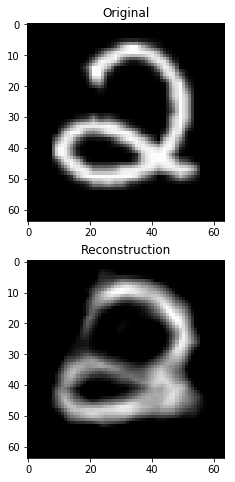

In [89]:
plot_img(o,o_rec,25)

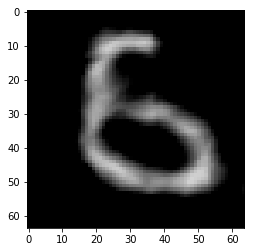

In [60]:
plot_img(outliers,0)

(array([9.780e+02, 1.386e+03, 2.149e+03, 2.220e+03, 1.858e+03, 1.309e+03, 8.390e+02, 5.040e+02, 3.010e+02, 1.870e+02,
        1.070e+02, 6.300e+01, 3.800e+01, 2.200e+01, 1.300e+01, 1.100e+01, 8.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([  3.559248,  10.69776 ,  17.836271,  24.974783,  32.113297,  39.25181 ,  46.39032 ,  53.52883 ,  60.667343,
         67.805855,  74.94437 ,  82.08288 ,  89.22139 ,  96.3599  , 103.49841 , 110.636925, 117.77544 , 124.91395 ,
        132.05246 , 139.19096 , 146.32948 ], dtype=float32),
 <a list of 20 Patch objects>)

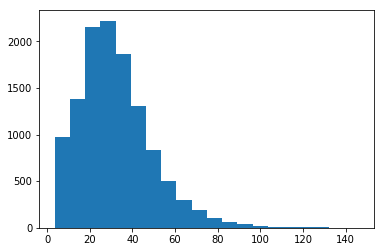

In [28]:
plt.hist(data,bins = 20)

In [24]:
loss_func = lambda x,x_rec : F.mse_loss(x, x_rec, reduction='none').view(x.shape[0], -1).sum(dim=-1)

In [16]:
t = x[0].permute(1,2,0).numpy()).float

In [20]:
t = np.concatenate([t,t,t],axis = -1)

In [29]:
data.valid_ds.x[2]

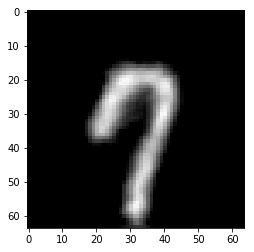

In [21]:
plt.imshow(t)

In [303]:
t = torch.load("encoder.pth")

In [94]:
t

Sequential(
  (0): Encoder(
    (enc_convs): Sequential(
      (0): Sequential(
        (0): Sequential(
          (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
        )
        (1): Sequential(
          (0): Conv2d(1, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
        )
      )
      (1): Sequential(
        (0): Sequential(
          (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=8, bias=False)
          (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
        )
        (1): Sequential(
          (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momen

In [95]:
path = untar_data(URLs.MNIST)
bs = 128
tfms = get_transforms(do_flip = False)

size = 64

data = (ImageList.from_folder(path/"training")
        .split_by_rand_pct(seed=42)
        .label_from_folder()
        .transform(tfms,size = size)
        .databunch(bs = bs))

def get_one_channel(batch):
    x,y = batch
    return x[:,0,:,:].unsqueeze(1),y
get_one_channel._order = 99

data.add_tfm(get_one_channel)

In [96]:
learn.data = data

In [241]:
x,y = learn.get_latents(ds_type=DatasetType.Train,n_batch=20)

In [242]:
x,y = x.numpy(),y.numpy()

In [243]:
from sklearn.ensemble import RandomForestClassifier

criterion = "entropy"

clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,
                            n_jobs=-1)

clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [244]:
y_pred = clf.predict(x)
(y_pred == y).mean()

0.9984375

In [245]:
x_val,y_val = learn.get_latents(ds_type=DatasetType.Valid)
x_val,y_val = x_val.numpy(),y_val.numpy()

In [246]:
y_pred = clf.predict(x_val)
(y_pred == y_val).mean()

0.8984166666666666